<a href="https://colab.research.google.com/github/Delcapa/BDA_6th/blob/main/Seattle%20weather%20prediction(230903).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### [ 데이터 분석 최종 리포팅 과제 ]

- Seattle weather prediction
- 시애틀의 날씨를 예측해 주세요!
- precipitation y값
- temp_max, temp_min, wind, weather 컬럼
- google 드라이브 업로드 완료

* EDA를 통해 데이터 시각화로 인사이트를 꼭 정리 후 예측 부탁드립니다.
* 시애틀 관련 외부 데이터 사용도 가능하니 자유롭게 진행해 주세요!

* 분석 인사이트는 필수적으로 정리 잘 해주셔야 합니다!

* 예측 보다도 EDA를 통한 인사이트 정리가 중요합니다!

* date: Date of observation
* precipitation: amount of precipitation (mm)
* temp_max: Maximum Temperature(°C)
* temp_min: Minimum Temperature(°C)
* wind: average wind-speed (m/s)
* weather

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
weather = pd.read_csv("/content/drive/MyDrive/seattle-weather.csv")
weather

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


### 데이터전처리

In [ ]:
weather.info()
# 결측치 없는것으로 보임

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [ ]:
# year, month, day 분리해서 컬럼 추가
weather["year"] = weather["date"].apply(lambda x:x.split("-")[0])
weather["month"] = weather["date"].apply(lambda x:x.split("-")[1])
weather["day"] = weather["date"].apply(lambda x:x.split("-")[2])

In [ ]:
# weather_max와 weather_min의 평균값인 weather_min 컬럼 추가
weather["temp_mean"] = (weather["temp_max"] + weather["temp_min"])/ 2

In [ ]:
weather

,date,precipitation,temp_max,temp_min,wind,weather,year,month,day,temp_mean
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012,01,01,8.90
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2012,01,02,6.70
2,2012-01-03,0.8,11.7,7.2,2.3,rain,2012,01,03,9.45
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2012,01,04,8.90
4,2012-01-05,1.3,8.9,2.8,6.1,rain,2012,01,05,5.85
...,...,...,...,...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain,2015,12,27,3.05
1457,2015-12-28,1.5,5.0,1.7,1.3,rain,2015,12,28,3.35
1458,2015-12-29,0.0,7.2,0.6,2.6,fog,2015,12,29,3.90
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun,2015,12,30,2.30


In [ ]:
weather.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather',
       'year', 'month', 'day', 'temp_mean'],
      dtype='object')

In [ ]:
column_seq = ['date', 'year', 'month', 'day', 'temp_min', 'temp_mean','temp_max','wind','weather', 'precipitation']

weather = weather[column_seq]

weather # 열 순서 변경 (슬라이싱)

,date,year,month,day,temp_min,temp_mean,temp_max,wind,weather,precipitation
0,2012-01-01,2012,01,01,5.0,8.90,12.8,4.7,drizzle,0.0
1,2012-01-02,2012,01,02,2.8,6.70,10.6,4.5,rain,10.9
2,2012-01-03,2012,01,03,7.2,9.45,11.7,2.3,rain,0.8
3,2012-01-04,2012,01,04,5.6,8.90,12.2,4.7,rain,20.3
4,2012-01-05,2012,01,05,2.8,5.85,8.9,6.1,rain,1.3
...,...,...,...,...,...,...,...,...,...,...
1456,2015-12-27,2015,12,27,1.7,3.05,4.4,2.9,rain,8.6
1457,2015-12-28,2015,12,28,1.7,3.35,5.0,1.3,rain,1.5
1458,2015-12-29,2015,12,29,0.6,3.90,7.2,2.6,fog,0.0
1459,2015-12-30,2015,12,30,-1.0,2.30,5.6,3.4,sun,0.0


### 시각화 EDA

In [ ]:
weather.groupby("year")["precipitation"].mean()

year
2012    3.349727
2013    2.268493
2014    3.377534
2015    3.121096
Name: precipitation, dtype: float64

<Axes: xlabel='year', ylabel='precipitation'>

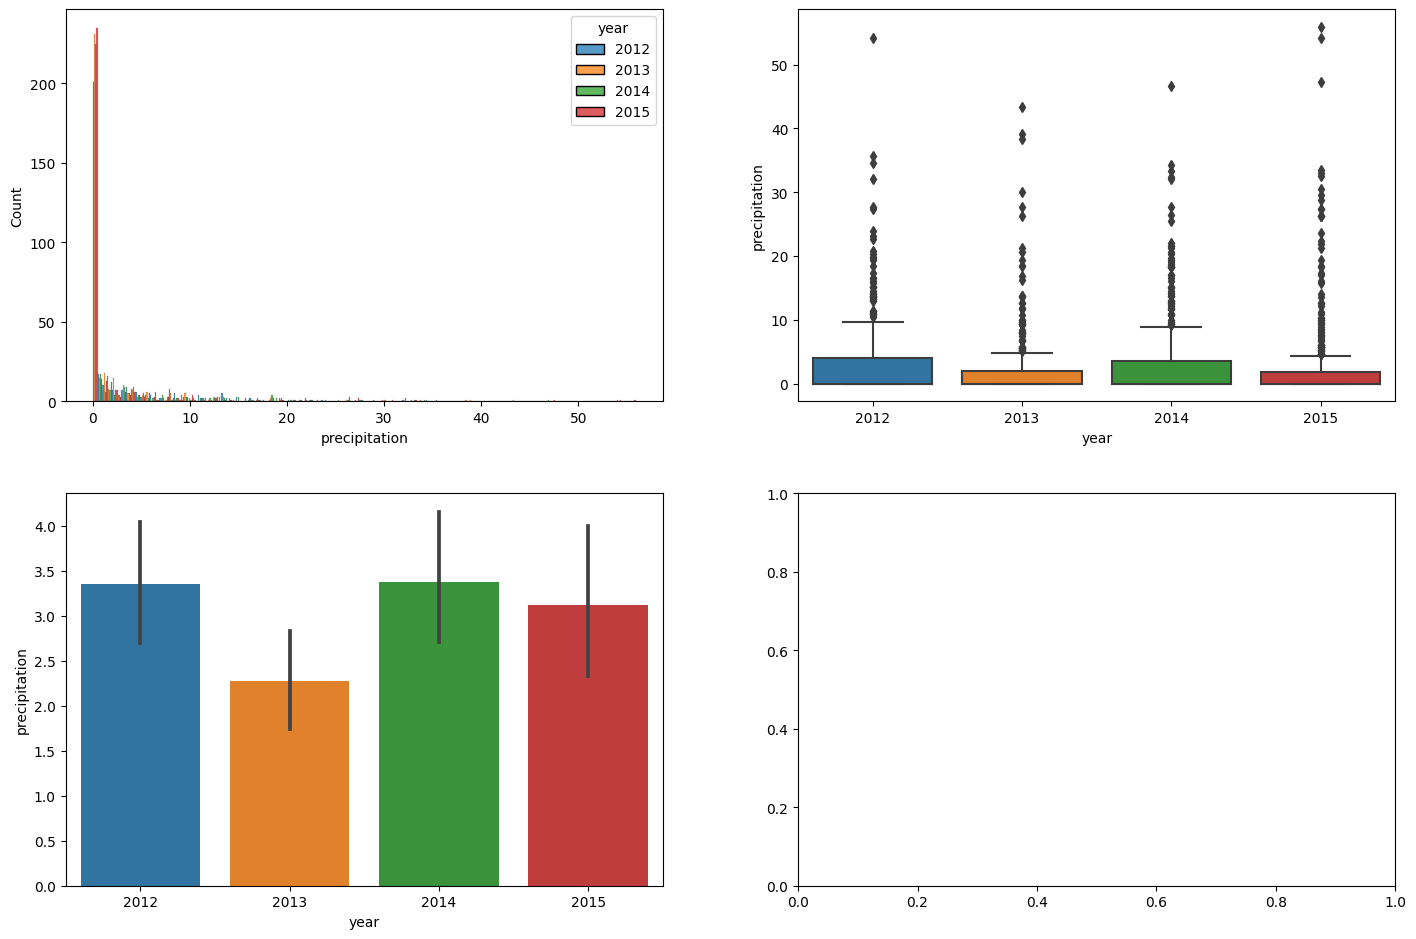

In [ ]:
plt.rc("axes", titlesize =20)

figure, axes = plt.subplots(nrows=2, ncols=2)
plt.tight_layout()
figure.set_size_inches(15,10)

sns.histplot(x="precipitation", hue="year",multiple='dodge' , data=weather, ax = axes[0,0])
sns.boxplot(x="year", y="precipitation", data=weather, ax = axes[0,1])
sns.barplot(x="year", y="precipitation", data=weather, ax = axes[1,0])
# year별 precipitation(강수) 차이 확인
# 2013년이 유난히 낮았음을 확인

In [ ]:
weather.groupby("month")["precipitation"].mean()

month
01    3.758065
02    3.734513
03    4.888710
04    3.128333
05    1.673387
06    1.107500
07    0.388710
08    1.320161
09    1.962500
10    4.059677
11    5.354167
12    5.021774
Name: precipitation, dtype: float64

<Axes: xlabel='month', ylabel='precipitation'>

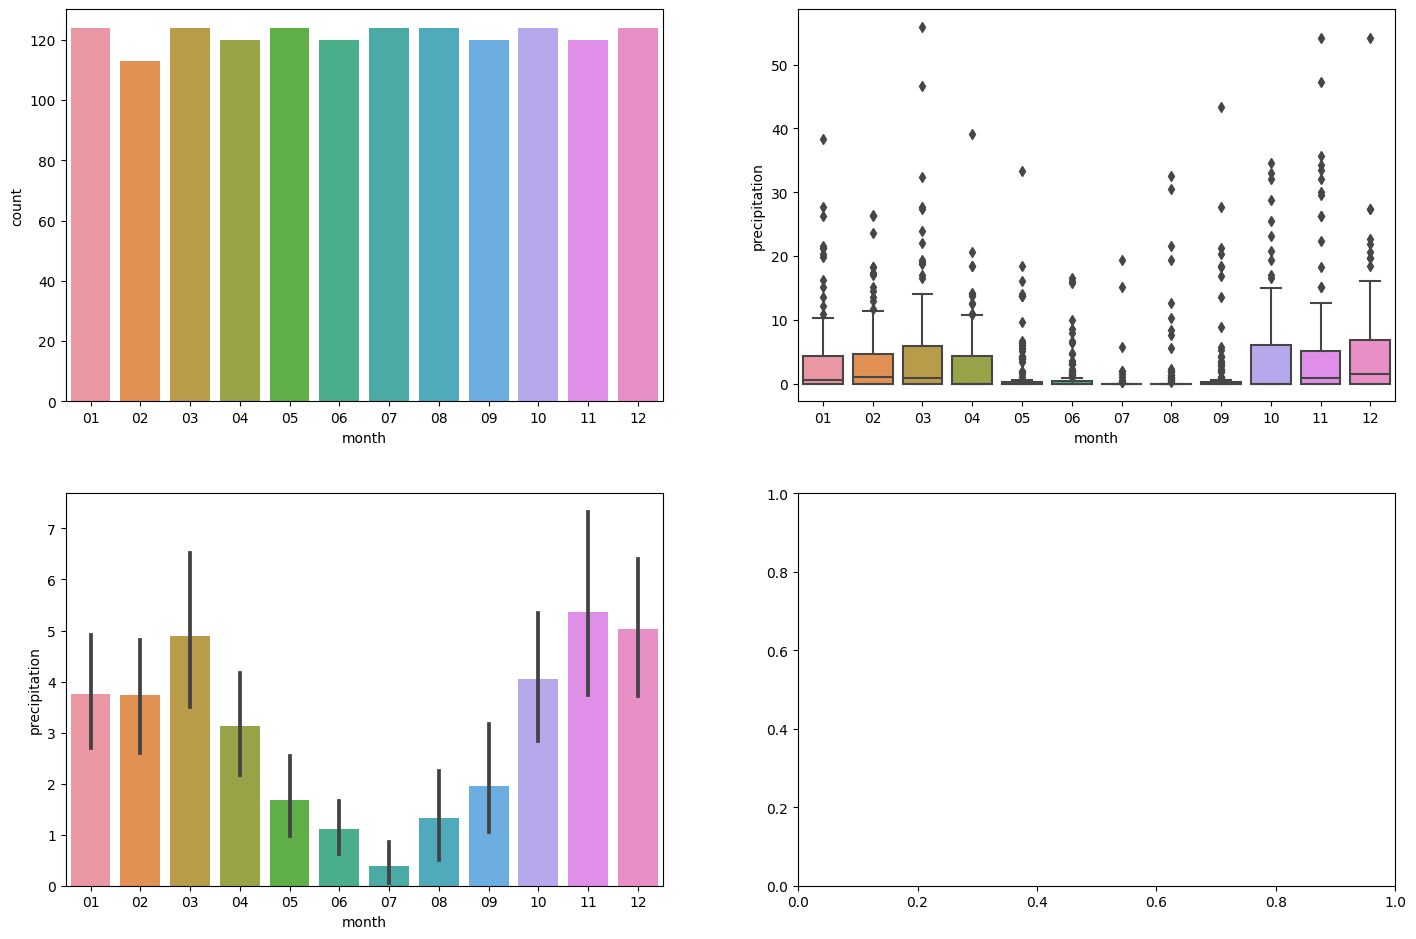

In [ ]:
plt.rc("axes", titlesize =20)

figure, axes = plt.subplots(nrows=2, ncols=2)
plt.tight_layout()
figure.set_size_inches(15,10)

sns.countplot(x="month", data=weather, ax = axes[0,0]) #데이터 분포 비율 확인
sns.boxplot(x="month", y="precipitation", data=weather, ax = axes[0,1])
sns.barplot(x="month", y="precipitation", data=weather, ax = axes[1,0])
# month별 precipitation(강수) 차이 확인
# 10월에서 3월까진 높은 강수를 보이나 4월에서 9월엔 낮은 강수를 보임

In [ ]:
weather.groupby("day")["precipitation"].mean()

day
01    2.300000
02    2.250000
03    2.610417
04    2.393750
05    4.333333
06    2.322917
07    3.854167
08    3.481250
09    2.193750
10    2.935417
11    2.210417
12    2.727083
13    3.043750
14    3.627083
15    3.597917
16    2.722917
17    3.585417
18    3.922917
19    3.372917
20    2.977083
21    2.727083
22    3.293750
23    4.031250
24    2.506250
25    2.420833
26    1.233333
27    2.137500
28    3.627083
29    4.433333
30    4.038636
31    3.275000
Name: precipitation, dtype: float64

<Axes: xlabel='day', ylabel='precipitation'>

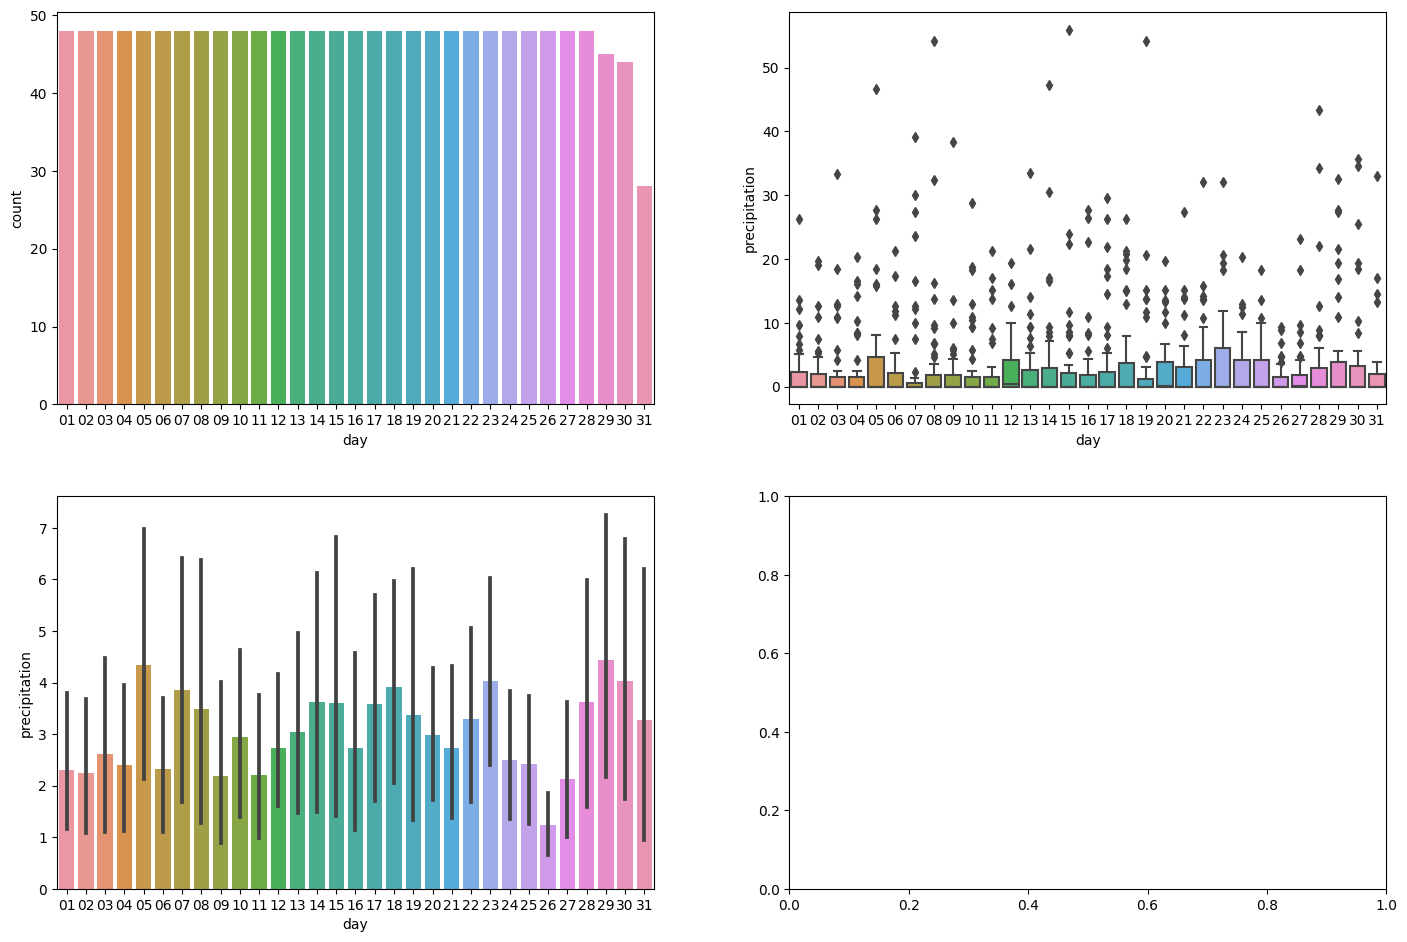

In [ ]:
plt.rc("axes", titlesize =20)

figure, axes = plt.subplots(nrows=2, ncols=2)
plt.tight_layout()
figure.set_size_inches(15,10)

sns.countplot(x="day", data=weather, ax = axes[0,0]) #데이터 분포 비율 확인
sns.boxplot(x="day", y="precipitation", data=weather, ax = axes[0,1])
sns.barplot(x="day", y="precipitation", data=weather, ax = axes[1,0])
# day별 precipitation(강수) 차이 확인

In [ ]:
weather.groupby("weather")["precipitation"].mean()

weather
drizzle    0.000000
fog        0.000000
rain       6.557878
snow       8.553846
sun        0.000000
Name: precipitation, dtype: float64

<Axes: xlabel='weather', ylabel='precipitation'>

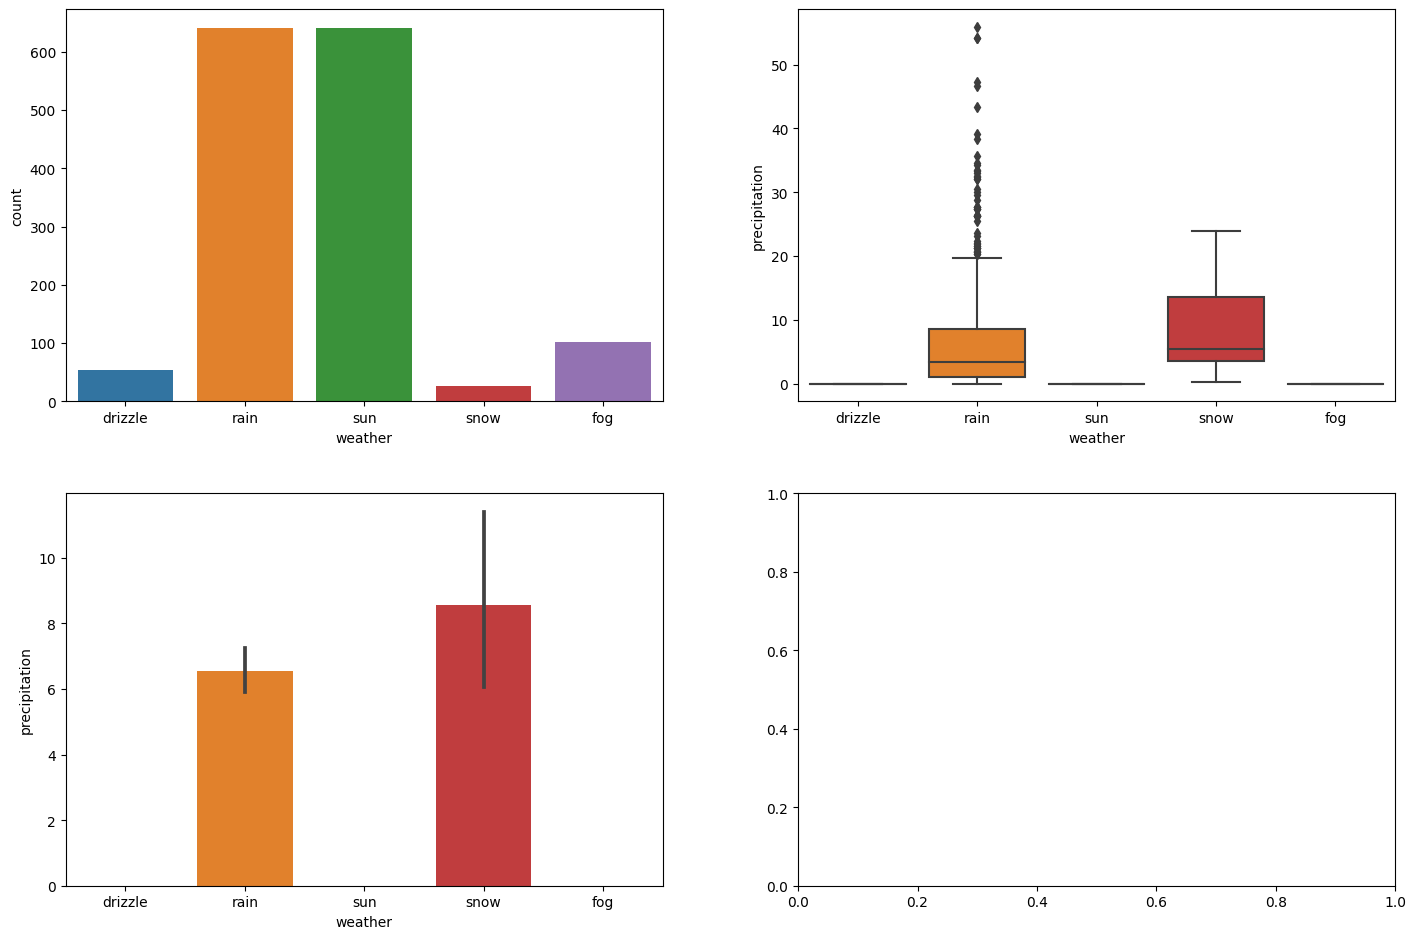

In [ ]:
plt.rc("axes", titlesize =20)

figure, axes = plt.subplots(nrows=2, ncols=2)
plt.tight_layout()
figure.set_size_inches(15,10)

sns.countplot(x="weather", data=weather, ax = axes[0,0]) #데이터 분포 비율 확인
sns.boxplot(x="weather", y="precipitation", data=weather, ax = axes[0,1])
sns.barplot(x="weather", y="precipitation", data=weather, ax = axes[1,0])
# weather별 precipitation(강수) 차이 확인

<Axes: xlabel='wind', ylabel='precipitation'>

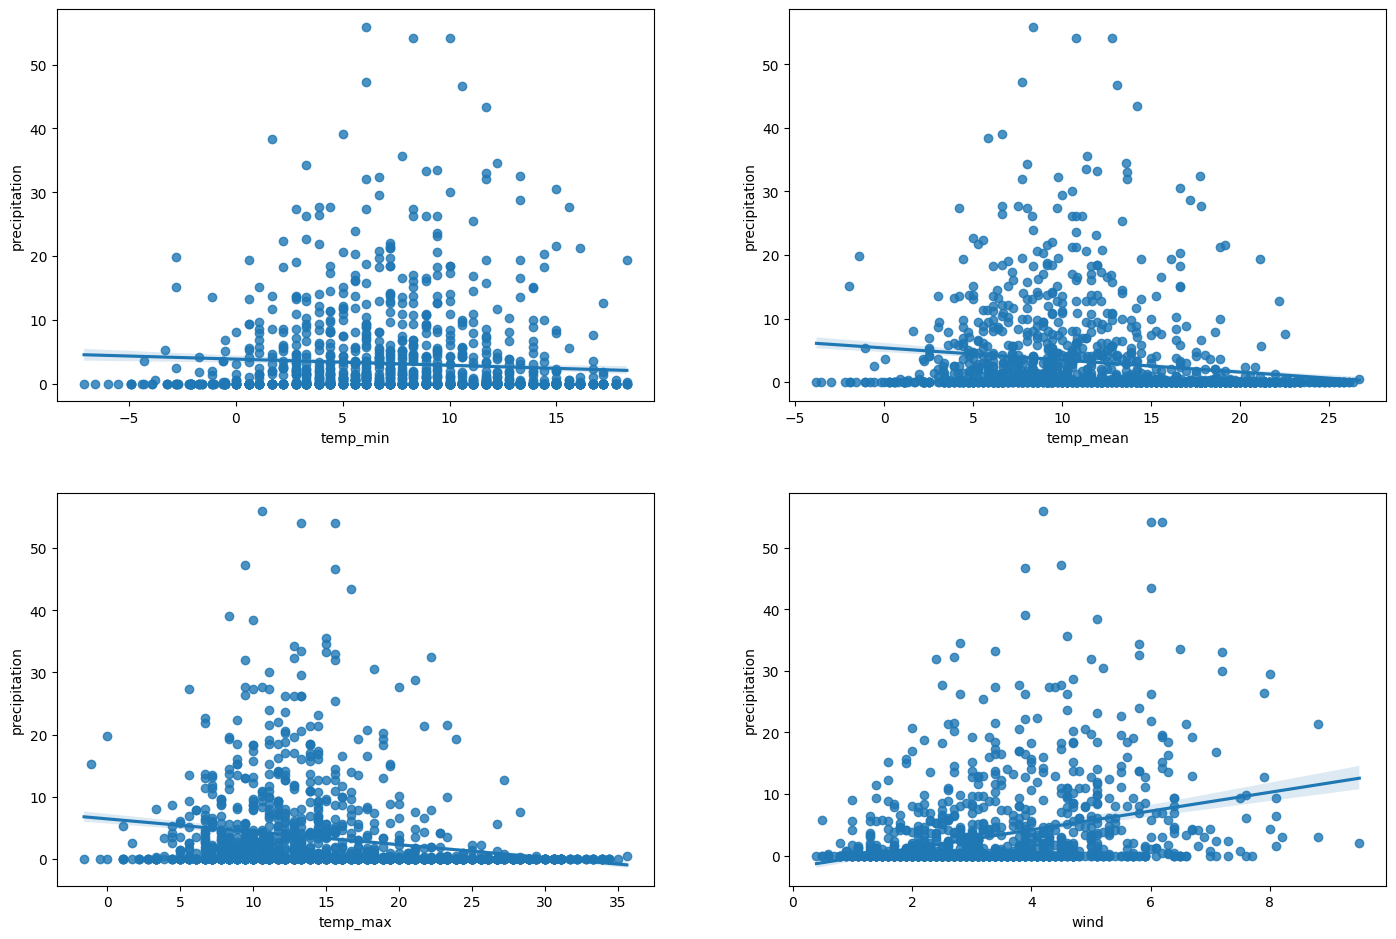

In [ ]:
plt.rc("axes", titlesize =20)

figure, axes = plt.subplots(nrows=2, ncols=2)
plt.tight_layout()
figure.set_size_inches(15,10)

sns.regplot(x="temp_min", y="precipitation", data=weather, ax=axes[0,0])
sns.regplot(x='temp_mean',y='precipitation',data = weather, ax=axes[0,1])
sns.regplot(x='temp_max',y='precipitation',data = weather, ax=axes[1,0])
sns.regplot(x='wind',y='precipitation',data = weather, ax=axes[1,1])

### 상관계수 분석

In [ ]:
weather.corr(method= "pearson")

<ipython-input-18-707424e98cb0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  weather.corr(method= "pearson")


,temp_min,temp_mean,temp_max,wind,precipitation
temp_min,1.000000,0.955234,0.875687,-0.074185,-0.072684
temp_mean,0.955234,1.000000,0.979346,-0.132067,-0.170465
temp_max,0.875687,0.979346,1.000000,-0.164857,-0.228555
wind,-0.074185,-0.132067,-0.164857,1.000000,0.328045
precipitation,-0.072684,-0.170465,-0.228555,0.328045,1.000000


<ipython-input-19-495a2072fdd7>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.zeros_like(weather.corr(), dtype = np.bool)
<ipython-input-19-495a2072fdd7>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(weather.corr(), dtype = np.bool)
<ipython-input-19-495a2072fdd7>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to si

<Axes: >

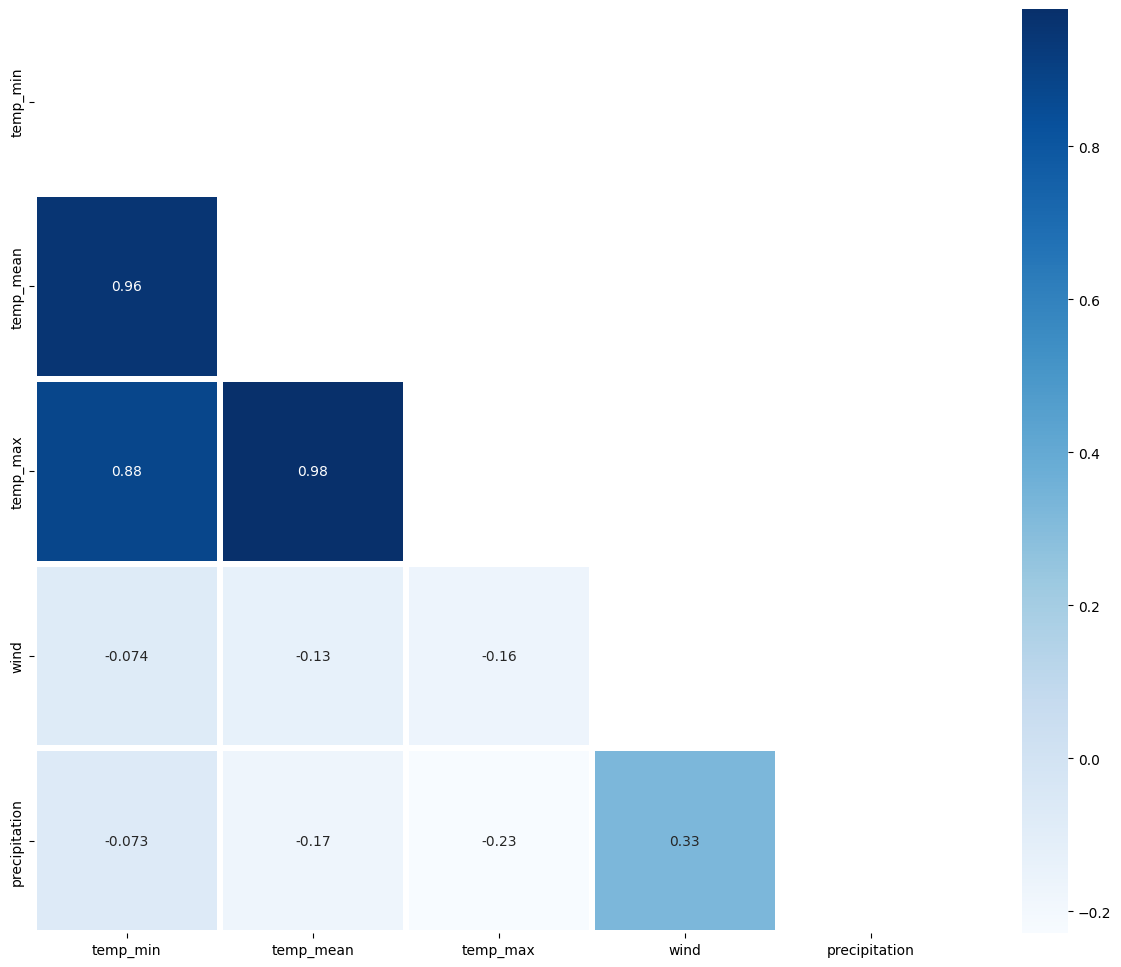

In [ ]:
plt.rcParams['figure.figsize'] = (15,12) # 팔레트 넓게

# 삼각형 마스크 제작
mask = np.zeros_like(weather.corr(), dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(weather.corr(method="pearson"),
            cmap = "Blues", # 색상
            annot = True, # 실제값 표시
            linewidth = 4, # 경계면 실선
            mask = mask # 표시하지 않을 마스크 부분을 지정
            )

In [ ]:
from scipy import stats

In [ ]:
weather_co = weather[["temp_min","temp_mean","temp_max", "wind", "precipitation"]]

In [ ]:
seq = ["temp_min","temp_mean","temp_max", "wind"]

for i in seq:
  a, b = stats.pearsonr(weather_co[i], weather_co["precipitation"])
  print("corr:",a,"p-value:",b)

  if b < 0.05:
    print(i, "컬럼과 count컬럼의 상관계수는 유의미합니다.")
  else:
    print(i,"컬럼과 count컬럼의 상관계수는 유의미하지 않습니다.")
  print("")
# 피어슨의 상관계수는 일반적으로 (+,-상관없이)
# 값이 0.0 ~ 0.1 이면, 없다고 할 수 있는 상관관계
# 값이 0.1 ~ 0.3 이면, 약한 상관관계
# 값이 0.3 ~ 0.7 이면, 뚜렷한 상관관계
# 값이 0.7 ~ 1.0 이면, 강한 상관관계

# 그러나 p-value가 0.05 미만일때만 상관계수가 의미를 가진다! (0.05 이상이면 상관계수가 큰 의미 x)

# 결과상 모두 유의미한 p-value를 보임
# temp_mean과 temp_max 그리고 wind컬럼은 어느정도의 상관관계를 보였음

corr: -0.07268403986408041 p-value: 0.005444211751207298
temp_min 컬럼과 count컬럼의 상관계수는 유의미합니다.

corr: -0.17046493331329027 p-value: 5.447408677519651e-11
temp_mean 컬럼과 count컬럼의 상관계수는 유의미합니다.

corr: -0.2285548164329703 p-value: 9.077749206822436e-19
temp_max 컬럼과 count컬럼의 상관계수는 유의미합니다.

corr: 0.3280450899352916 p-value: 5.368489100920429e-38
wind 컬럼과 count컬럼의 상관계수는 유의미합니다.



### 모델링

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
weather.columns

Index(['date', 'year', 'month', 'day', 'temp_min', 'temp_mean', 'temp_max',
       'wind', 'weather', 'precipitation'],
      dtype='object')

In [ ]:
weather_sp = weather[['year', 'month', 'day', 'temp_mean', 'temp_max','wind', 'weather',"precipitation"]]

In [ ]:
weather_sp1 = pd.get_dummies(weather_sp)

In [ ]:
weather_sp1

,temp_mean,temp_max,wind,precipitation,year_2012,year_2013,year_2014,year_2015,month_01,month_02,...,day_27,day_28,day_29,day_30,day_31,weather_drizzle,weather_fog,weather_rain,weather_snow,weather_sun
0,8.90,12.8,4.7,0.0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,6.70,10.6,4.5,10.9,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,9.45,11.7,2.3,0.8,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,8.90,12.2,4.7,20.3,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,5.85,8.9,6.1,1.3,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,3.05,4.4,2.9,8.6,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
1457,3.35,5.0,1.3,1.5,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1458,3.90,7.2,2.6,0.0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
1459,2.30,5.6,3.4,0.0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(weather_sp1.drop('precipitation', axis=1), weather_sp1['precipitation'], test_size=0.3, random_state=111)

In [ ]:
from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()

linear_reg_model.fit(X_train, y_train)

In [ ]:
pred = linear_reg_model.predict(X_train)
pred_test = linear_reg_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:

print(mean_squared_error(y_train, pred))
print(mean_squared_error(y_test, pred_test))

25.68673122124779
42.923348123333454


#### 로그 스케일링

<ipython-input-45-030fae28066f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(weather["precipitation"])


<Axes: xlabel='precipitation', ylabel='Density'>

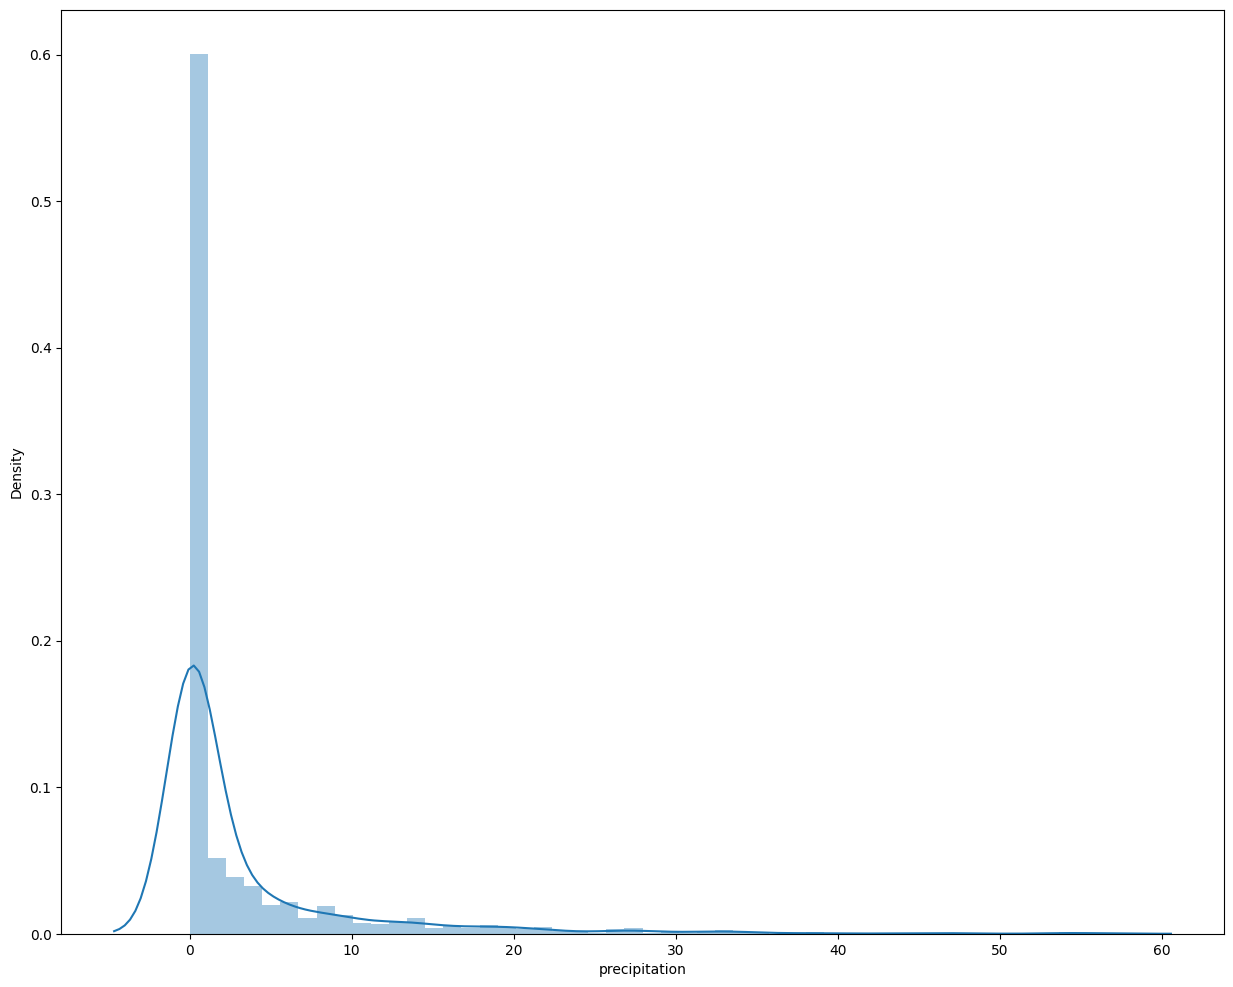

In [ ]:
sns.distplot(weather["precipitation"])

In [ ]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

#np.log로 변환 수행하는 변형 객체 transformer 생성
transformer = FunctionTransformer(np.log)

# 데이터 스케일링 진행
precipitation_scaled = transformer.transform(weather["precipitation"])

#스케일 변환된 데이터 세트가 Numpy ndarray로 반환돼 이를 DataFrame으로 변환
precipitation_df_scaled = pd.DataFrame(data=precipitation_scaled)

precipitation_df_scaled = precipitation_df_scaled.replace(-np.inf, 0)
# log 0의 값이 마이너스 무한대가 나오므로 0값으로 대체해준다

precipitation_df_scaled
# 데이터 구간 변경 확인

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,precipitation
0,0.000000
1,2.388763
2,-0.223144
3,3.010621
4,0.262364
...,...
1456,2.151762
1457,0.405465
1458,0.000000
1459,0.000000


In [ ]:
weather_sp2 = weather_sp1.drop(['precipitation'], axis=1)

In [ ]:
weather_sp2_f = pd.concat([weather_sp2, precipitation_df_scaled],axis=1)
weather_sp2_f

,temp_mean,temp_max,wind,year_2012,year_2013,year_2014,year_2015,month_01,month_02,month_03,...,day_28,day_29,day_30,day_31,weather_drizzle,weather_fog,weather_rain,weather_snow,weather_sun,precipitation
0,8.90,12.8,4.7,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0.000000
1,6.70,10.6,4.5,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,2.388763
2,9.45,11.7,2.3,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,-0.223144
3,8.90,12.2,4.7,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,3.010621
4,5.85,8.9,6.1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0.262364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,3.05,4.4,2.9,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,2.151762
1457,3.35,5.0,1.3,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0.405465
1458,3.90,7.2,2.6,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0.000000
1459,2.30,5.6,3.4,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0.000000


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(weather_sp2_f.drop('precipitation', axis=1), weather_sp2_f['precipitation'], test_size=0.3, random_state=111)

In [ ]:
from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()

linear_reg_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
pred = linear_reg_model.predict(X_train)
pred_test = linear_reg_model.predict(X_test)

In [ ]:
print(mean_squared_error(y_train, pred))
print(mean_squared_error(y_test, pred_test))

0.6830611283073182
0.8048688459831453
